### Import Statements

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Setting the global style, color palette and scale for all the plots

> Use the, `sns.set_style()` function to set the style to any of the 5 available figure styles, namely, `"white", "dark", "whitegrid", "darkgrid", "ticks"`.

> Use the `sns.set_palette()` function to set the color palette of the figure.

- Seaborn has a group of preset palettes called diverging palettes that are great to use if your visualization deals with a scale where the two ends of the scale are opposites and there is a neutral midpoint. Such as, `"vlag", "icefire", "coolwarm", "Spectral", "RdBu", "PuOr"` etc.

- Another group of palettes are called sequential palettes. These are a single color (or two colors blended) moving from light to dark values. Sequential palettes are great for emphasizing a variable on a continuous scale. Such as, `"rocket", "mako", "flare", "crest", "magma", "viridis"` etc.
 
We can also pass in a list of colors in any valid matplotlib format to set a custom color palette. See the documentation @https://seaborn.pydata.org/tutorial/color_palettes.html for more details.

>> The `seaborn.color_palette(palette, n_colors)` function can be used to create a cusotm color paletter or get you a predefined one and the `seaborn.palplot()` function can be used to plot the color palette as a horizontal array.

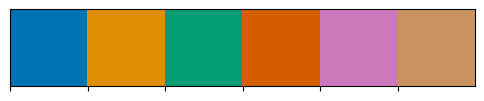

In [14]:
sns.palplot(sns.color_palette("colorblind", 6))

> We can change the scale of our plot by using the `sns.set_context()` function. The scale options from smallest to largest are `"paper", "notebook", "talk", and "poster"`. The default context is "paper". 

## Modification of the plots

The seaborn plotting functions returns two types of objects: FacetGrid objects and AxesSubplot objects. The FacetGrid object is used for creating multple plots in a single figure. The AxesSubplot object is used for creating a single plot. So, the plotting functions that takes 'row' and 'col' arguments such as, *sns.catplot()*, *sns.relplot()* etc. returns a FacetGrid object, while single plotting functions such as, *sns.countplot()*, *sns.barplot()*, *sns.lineplot()* etc. returns an AxesSubplot object.

- ##### The AxesSubplot object returns a matplotlib Axes object. So we can use direct matplotlib functions to modify the plot.

- ##### Available modification methods for the FacetGrid object

In [2]:
# Loading in an example dataset
restaurant_tips = sns.load_dataset("tips")
restaurant_tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


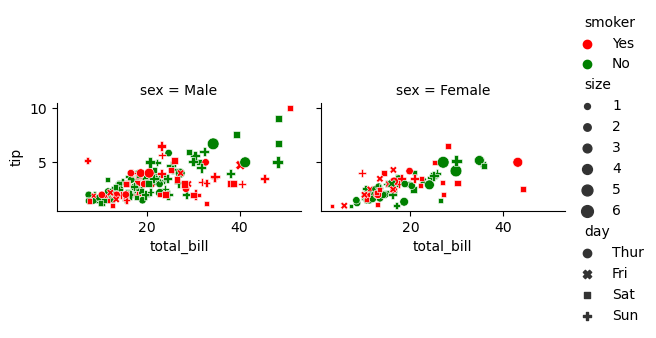

In [3]:
# a scatter plot
g = sns.relplot(
    restaurant_tips,
    kind="scatter",
    x="total_bill",
    y="tip",
    hue="smoker",
    palette=["r", "g"],
    style="day",
    size="size",
    col="sex",
    height=2,
    aspect=1.5,
)
plt.show()

In [4]:
type(g)

seaborn.axisgrid.FacetGrid

In [5]:
[mod_method for mod_method in dir(g) if mod_method.startswith("_") == False]

['add_legend',
 'apply',
 'ax',
 'axes',
 'axes_dict',
 'col_names',
 'data',
 'despine',
 'facet_axis',
 'facet_data',
 'fig',
 'figure',
 'hue_kws',
 'hue_names',
 'legend',
 'map',
 'map_dataframe',
 'pipe',
 'refline',
 'row_names',
 'savefig',
 'set',
 'set_axis_labels',
 'set_titles',
 'set_xlabels',
 'set_xticklabels',
 'set_ylabels',
 'set_yticklabels',
 'tick_params',
 'tight_layout']

We can use these available methods to modify the figure as we like. Most of these methods affects all the subplots in the figure. If we want we can use the *.axes* method and use indexing to access the individual axes of the FacetGrid object and modify them directly using matplotlib. We can also access the figure object using the *.fig* method and modify it using matplotlib.

In [6]:
g.axes[0, 0]

<Axes: title={'center': 'sex = Male'}, xlabel='total_bill', ylabel='tip'>

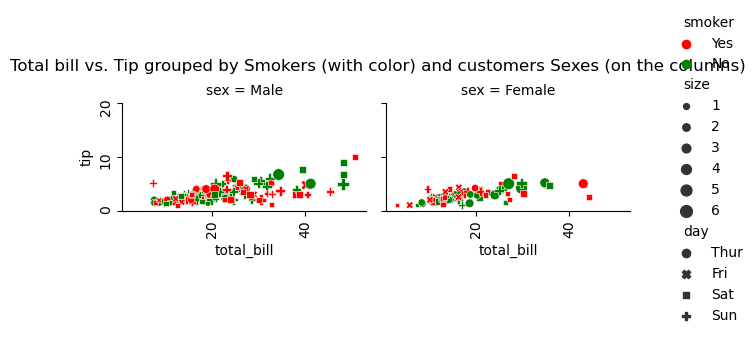

In [10]:
plt.sca(g.axes[0, 1])
g.fig.suptitle(
    "Total bill vs. Tip grouped by Smokers (with color) and customers Sexes (on the columns)",
    y=1.05,
)
g.set(ylim=(0, 20))
g.tick_params(labelrotation=90)
# we could've also used plt.xticks(rotation=90); this works both for AxesObjects and FacetGridObjects
plt.show()